# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
url = "http://api.openweathermap.org/data/2.5/weather?"


## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url = "http://api.openweathermap.org/data/2.5/forecast?"
#units = "imperial"
#query_url = f"{url}appid={api_key}&units={units}&q="

#for city in cities:
    #response=requests.get(base_url).json()
    
    #pprint(response)

In [39]:
#Perform a weather check on each city using a series of successive API calls.f"{url}appid={api_key}&units={units}&q="
url = "http://api.openweathermap.org/data/2.5/forecast?"
units = "imperial"
base_url = f"{url}appid={api_key}&units={units}&q="


set_num = 1
index =0

cloudiness = []
humidity = []
lat = []
lng = []
temp = []
max_temp = []
wind_speed = []
country=[]
date=[]
city_list=[]

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        response = requests.get(base_url + city).json()
        print(f"Processing Record {index} of Set {set_num} | " + city)
        print(f"{url}appid={api_key}&units={units}&q={city}")
        index +=1
        if(index > 49):
            index=0
            set_num +=1
              
        cloudiness.append(response["list"][0]["clouds"]["all"])
        humidity.append(response["list"][0]["main"]["humidity"])
        lat.append(response["city"]["coord"]["lat"])
        lng.append(response["city"]["coord"]["lon"])
        temp.append(response["list"][0]["main"]["temp"])
        wind_speed.append(response["list"][0]["wind"]["speed"])
        country.append(response["city"]["country"])
        date.append(response["list"][0]["dt"])
        max_temp.append(response["list"][0]["main"]["temp_max"])
        city_list.append(response["city"]["name"])
       
    except(KeyError, ValueError):
        print("City not Found. Next city.")
        
    pass
print("------------------------")
print("Data Retrieval Complete          ")


Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | krasnyye baki
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=krasnyye baki
Processing Record 1 of Set 1 | albany
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=albany
Processing Record 2 of Set 1 | barentsburg
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=barentsburg
City not Found. Next city.
Processing Record 3 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=busselton
Processing Record 4 of Set 1 | kavieng
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=kavieng
Processing Record 5 of Set 1 | narsaq
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q

Processing Record 2 of Set 2 | high prairie
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=high prairie
Processing Record 3 of Set 2 | upernavik
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=upernavik
Processing Record 4 of Set 2 | kruisfontein
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=kruisfontein
Processing Record 5 of Set 2 | lazaro cardenas
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=lazaro cardenas
Processing Record 6 of Set 2 | bartoszyce
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=bartoszyce
Processing Record 7 of Set 2 | madridejos
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=madridejos
Processing Record 8 of Set 2 | sao joao da

Processing Record 4 of Set 3 | nabire
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=nabire
Processing Record 5 of Set 3 | nanortalik
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=nanortalik
Processing Record 6 of Set 3 | tura
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=tura
Processing Record 7 of Set 3 | kuche
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=kuche
City not Found. Next city.
Processing Record 8 of Set 3 | meyungs
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=meyungs
City not Found. Next city.
Processing Record 9 of Set 3 | manzhouli
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=manzhouli
Processing Record 10 of Set 3 | planaltina

Processing Record 7 of Set 4 | kerman
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=kerman
Processing Record 8 of Set 4 | tuy hoa
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=tuy hoa
Processing Record 9 of Set 4 | jackson
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=jackson
Processing Record 10 of Set 4 | cape town
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=cape town
Processing Record 11 of Set 4 | bayshore gardens
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=bayshore gardens
Processing Record 12 of Set 4 | dindori
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=dindori
Processing Record 13 of Set 4 | port hedland
http://api.openweathermap.

Processing Record 10 of Set 5 | savasleyka
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=savasleyka
Processing Record 11 of Set 5 | tessalit
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=tessalit
Processing Record 12 of Set 5 | skjervoy
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=skjervoy
Processing Record 13 of Set 5 | victoria
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=victoria
Processing Record 14 of Set 5 | bumba
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=bumba
Processing Record 15 of Set 5 | kahului
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=kahului
Processing Record 16 of Set 5 | padang
http://api.openweathermap.org/data/2.5/fo

Processing Record 12 of Set 6 | kodinsk
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=kodinsk
Processing Record 13 of Set 6 | ilhabela
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=ilhabela
Processing Record 14 of Set 6 | koumac
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=koumac
Processing Record 15 of Set 6 | buala
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=buala
Processing Record 16 of Set 6 | elko
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=elko
Processing Record 17 of Set 6 | suntar
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=suntar
Processing Record 18 of Set 6 | beringovskiy
http://api.openweathermap.org/data/2.5/forecast?appid=c

Processing Record 15 of Set 7 | lagoa
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=lagoa
Processing Record 16 of Set 7 | faanui
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=faanui
Processing Record 17 of Set 7 | promysla
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=promysla
City not Found. Next city.
Processing Record 18 of Set 7 | potchefstroom
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=potchefstroom
Processing Record 19 of Set 7 | lazdijai
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=lazdijai
Processing Record 20 of Set 7 | teahupoo
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=teahupoo
Processing Record 21 of Set 7 | neftcala
http://a

Processing Record 18 of Set 8 | jiujiang
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=jiujiang
Processing Record 19 of Set 8 | annau
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=annau
Processing Record 20 of Set 8 | port elizabeth
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=port elizabeth
Processing Record 21 of Set 8 | clyde river
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=clyde river
Processing Record 22 of Set 8 | chuy
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=chuy
Processing Record 23 of Set 8 | tongchuan
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=tongchuan
Processing Record 24 of Set 8 | tavares
http://api.openweathermap.org/

Processing Record 21 of Set 9 | khowst
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=khowst
City not Found. Next city.
Processing Record 22 of Set 9 | lumut
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=lumut
Processing Record 23 of Set 9 | gravdal
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=gravdal
Processing Record 24 of Set 9 | longonjo
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=longonjo
Processing Record 25 of Set 9 | xining
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=xining
Processing Record 26 of Set 9 | sal rei
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=sal rei
Processing Record 27 of Set 9 | dubai
http://api.openweathermap.org

Processing Record 23 of Set 10 | dickinson
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=dickinson
Processing Record 24 of Set 10 | charlestown
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=charlestown
Processing Record 25 of Set 10 | saldanha
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=saldanha
Processing Record 26 of Set 10 | saint-pierre
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=saint-pierre
Processing Record 27 of Set 10 | san isidro
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=san isidro
Processing Record 28 of Set 10 | port-de-bouc
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=port-de-bouc
Processing Record 29 of Set 10 | burnie
ht

Processing Record 26 of Set 11 | matsanga
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=matsanga
City not Found. Next city.
Processing Record 27 of Set 11 | wattegama
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=wattegama
Processing Record 28 of Set 11 | kieta
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=kieta
Processing Record 29 of Set 11 | ashland
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=ashland
Processing Record 30 of Set 11 | severnyy-kospashskiy
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=severnyy-kospashskiy
Processing Record 31 of Set 11 | takoradi
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=takoradi
Processing Record 32 of S

Processing Record 28 of Set 12 | mantua
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=mantua
Processing Record 29 of Set 12 | godfrey
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=godfrey
Processing Record 30 of Set 12 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=verkhnevilyuysk
Processing Record 31 of Set 12 | samarai
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=samarai
Processing Record 32 of Set 12 | smirnykh
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=smirnykh
Processing Record 33 of Set 12 | lawrence
http://api.openweathermap.org/data/2.5/forecast?appid=ca2350ca5428d9fa910001e680cc4cd0&units=imperial&q=lawrence
Processing Record 34 of Set 12 | begamganj
http://api.openweathe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
weather_df=pd.DataFrame({"City":city_list, 
                        "Cloudiness":cloudiness,
                        "Country":country,
                        "Date": date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed})
weather_df.to_csv("..cities.csv", index=False)
weather_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [25]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Krasnyye Baki,0,RU,1554195600,75,57.1310,45.1599,40.84,4.16
1,Albany,0,US,1554195600,55,42.6512,-73.7550,21.67,4.36
2,Busselton,0,AU,1554195600,83,-33.6445,115.3489,76.41,13.22
3,Kavieng,56,PG,1554195600,96,-2.5745,150.7967,85.21,8.97
4,Narsaq,100,GL,1554195600,90,60.9127,-46.0453,32.56,14.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

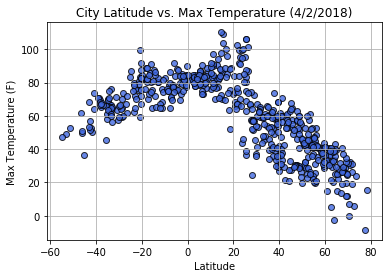

In [29]:
x=weather_df["Lat"]
y1=weather_df["Max Temp"]

plt.scatter(x, y1, marker="o", facecolors="royalblue", edgecolor="black",alpha=0.8)

plt.title("City Latitude vs. Max Temperature (4/2/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("..latitude_temp.png")

#### Latitude vs. Humidity Plot

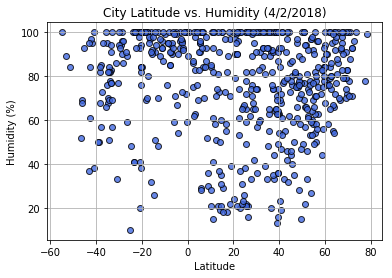

In [30]:
x=weather_df["Lat"]
y1=weather_df["Humidity"]

plt.scatter(x, y1, marker="o", facecolors="royalblue", edgecolor="black",alpha=0.8)

plt.title("City Latitude vs. Humidity (4/2/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("..latitude_humidity.png")

#### Latitude vs. Cloudiness Plot

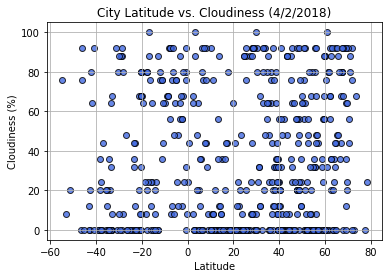

In [31]:
x=weather_df["Lat"]
y1=weather_df["Cloudiness"]

plt.scatter(x, y1, marker="o", facecolors="royalblue", edgecolor="black",alpha=0.8)

plt.title("City Latitude vs. Cloudiness (4/2/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("..latitude_cloud.png")

#### Latitude vs. Wind Speed Plot

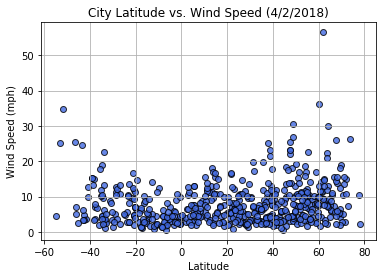

In [32]:
x=weather_df["Lat"]
y1=weather_df["Wind Speed"]

plt.scatter(x, y1, marker="o", facecolors="royalblue", edgecolor="black",alpha=0.8)

plt.title("City Latitude vs. Wind Speed (4/2/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("..latitude_wind_speed.png")

In [ ]:
# Observations  Temperture and latitude form a bell shape curve where the equator is the hottest spot them tappers down toward north pole and south pole.  
#There no observable correlation beween wind speed, cloudiness, and humidity and latitude.  